Radiological Society of North America  
Detect and classify traumatic abdominal injuries  
Abdominal Trauma Detection

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive

In [3]:
drive.mount('./content')

Mounted at ./content


In [14]:
ls content/MyDrive/'Colab Notebooks'/data

image_level_labels.csv  test_series_meta.csv  train_series_meta.csv
sample_submission.csv   train.csv


In [4]:
path = 'content/MyDrive/Colab Notebooks/data/'

In [5]:
train_df = pd.read_csv(path + 'train.csv')
train_meta_df = pd.read_csv(path + 'train_series_meta.csv')
test_meta_df = pd.read_csv(path + 'test_series_meta.csv')
img_labels_df = pd.read_csv(path + 'image_level_labels.csv')
submission = pd.read_csv(path +'sample_submission.csv')

In [56]:
submission

,patient_id,bowel_healthy,bowel_injury,extravasation_healthy,extravasation_injury,kidney_healthy,kidney_low,kidney_high,liver_healthy,liver_low,liver_high,spleen_healthy,spleen_low,spleen_high
0,48843,0.5,0.5,0.5,0.5,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333
1,50046,0.5,0.5,0.5,0.5,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333
2,63706,0.5,0.5,0.5,0.5,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333


In [12]:
len(submission.columns), submission.columns

(14,
 Index(['patient_id', 'bowel_healthy', 'bowel_injury', 'extravasation_healthy',
        'extravasation_injury', 'kidney_healthy', 'kidney_low', 'kidney_high',
        'liver_healthy', 'liver_low', 'liver_high', 'spleen_healthy',
        'spleen_low', 'spleen_high'],
       dtype='object'))

In [13]:
len(train_df.columns), train_df.columns

(15,
 Index(['patient_id', 'bowel_healthy', 'bowel_injury', 'extravasation_healthy',
        'extravasation_injury', 'kidney_healthy', 'kidney_low', 'kidney_high',
        'liver_healthy', 'liver_low', 'liver_high', 'spleen_healthy',
        'spleen_low', 'spleen_high', 'any_injury'],
       dtype='object'))

# Data 확인

In [49]:
train_df.head()

,patient_id,bowel_healthy,bowel_injury,extravasation_healthy,extravasation_injury,kidney_healthy,kidney_low,kidney_high,liver_healthy,liver_low,liver_high,spleen_healthy,spleen_low,spleen_high,any_injury
0,10004,1,0,0,1,0,1,0,1,0,0,0,0,1,1
1,10005,1,0,1,0,1,0,0,1,0,0,1,0,0,0
2,10007,1,0,1,0,1,0,0,1,0,0,1,0,0,0
3,10026,1,0,1,0,1,0,0,1,0,0,1,0,0,0
4,10051,1,0,1,0,1,0,0,1,0,0,0,1,0,1


In [66]:
train_df.columns

Index(['patient_id', 'bowel_healthy', 'bowel_injury', 'extravasation_healthy',
       'extravasation_injury', 'kidney_healthy', 'kidney_low', 'kidney_high',
       'liver_healthy', 'liver_low', 'liver_high', 'spleen_healthy',
       'spleen_low', 'spleen_high', 'any_injury'],
      dtype='object')

In [34]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3147 entries, 0 to 3146
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   patient_id             3147 non-null   int64
 1   bowel_healthy          3147 non-null   int64
 2   bowel_injury           3147 non-null   int64
 3   extravasation_healthy  3147 non-null   int64
 4   extravasation_injury   3147 non-null   int64
 5   kidney_healthy         3147 non-null   int64
 6   kidney_low             3147 non-null   int64
 7   kidney_high            3147 non-null   int64
 8   liver_healthy          3147 non-null   int64
 9   liver_low              3147 non-null   int64
 10  liver_high             3147 non-null   int64
 11  spleen_healthy         3147 non-null   int64
 12  spleen_low             3147 non-null   int64
 13  spleen_high            3147 non-null   int64
 14  any_injury             3147 non-null   int64
dtypes: int64(15)
memory usage: 368.9 KB


In [35]:
train_df.describe()

,patient_id,bowel_healthy,bowel_injury,extravasation_healthy,extravasation_injury,kidney_healthy,kidney_low,kidney_high,liver_healthy,liver_low,liver_high,spleen_healthy,spleen_low,spleen_high,any_injury
count,3147.000000,3147.000000,3147.000000,3147.000000,3147.000000,3147.000000,3147.000000,3147.000000,3147.000000,3147.000000,3147.000000,3147.000000,3147.000000,3147.000000,3147.000000
mean,32664.239593,0.979663,0.020337,0.936447,0.063553,0.942167,0.036543,0.021290,0.897998,0.082301,0.019701,0.887512,0.063235,0.049253,0.271687
std,18792.043458,0.141172,0.141172,0.243993,0.243993,0.233464,0.187666,0.144373,0.302699,0.274866,0.138994,0.316016,0.243424,0.216431,0.444900
min,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16355.500000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,32195.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,49302.500000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,65508.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


(<Axes: >,
 patient_id               0
 bowel_healthy            0
 bowel_injury             0
 extravasation_healthy    0
 extravasation_injury     0
 kidney_healthy           0
 kidney_low               0
 kidney_high              0
 liver_healthy            0
 liver_low                0
 liver_high               0
 spleen_healthy           0
 spleen_low               0
 spleen_high              0
 any_injury               0
 dtype: int64)

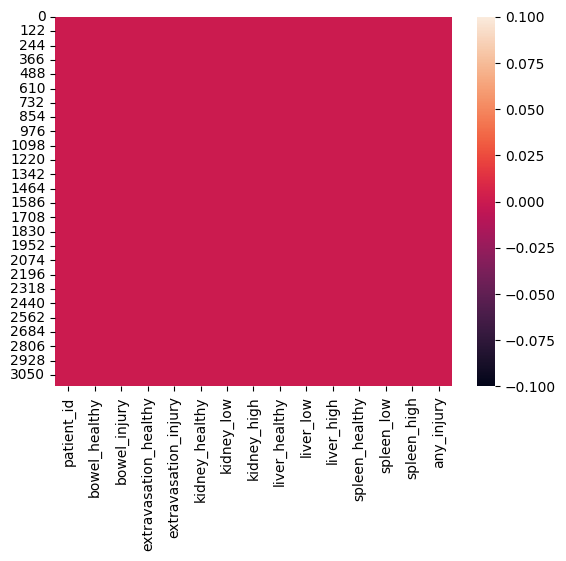

In [52]:
sns.heatmap(train_df.isnull()), train_df.isnull().sum()

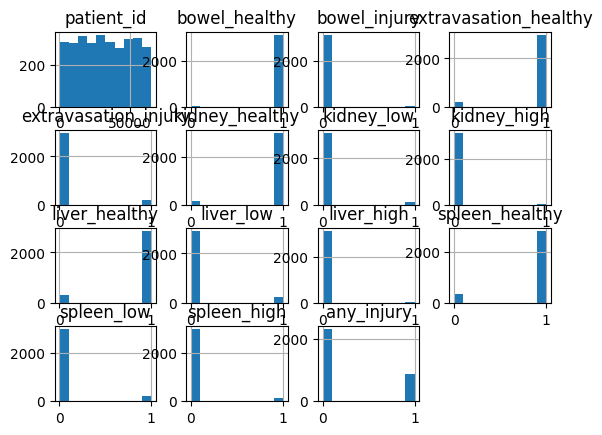

In [29]:
train_df.hist();

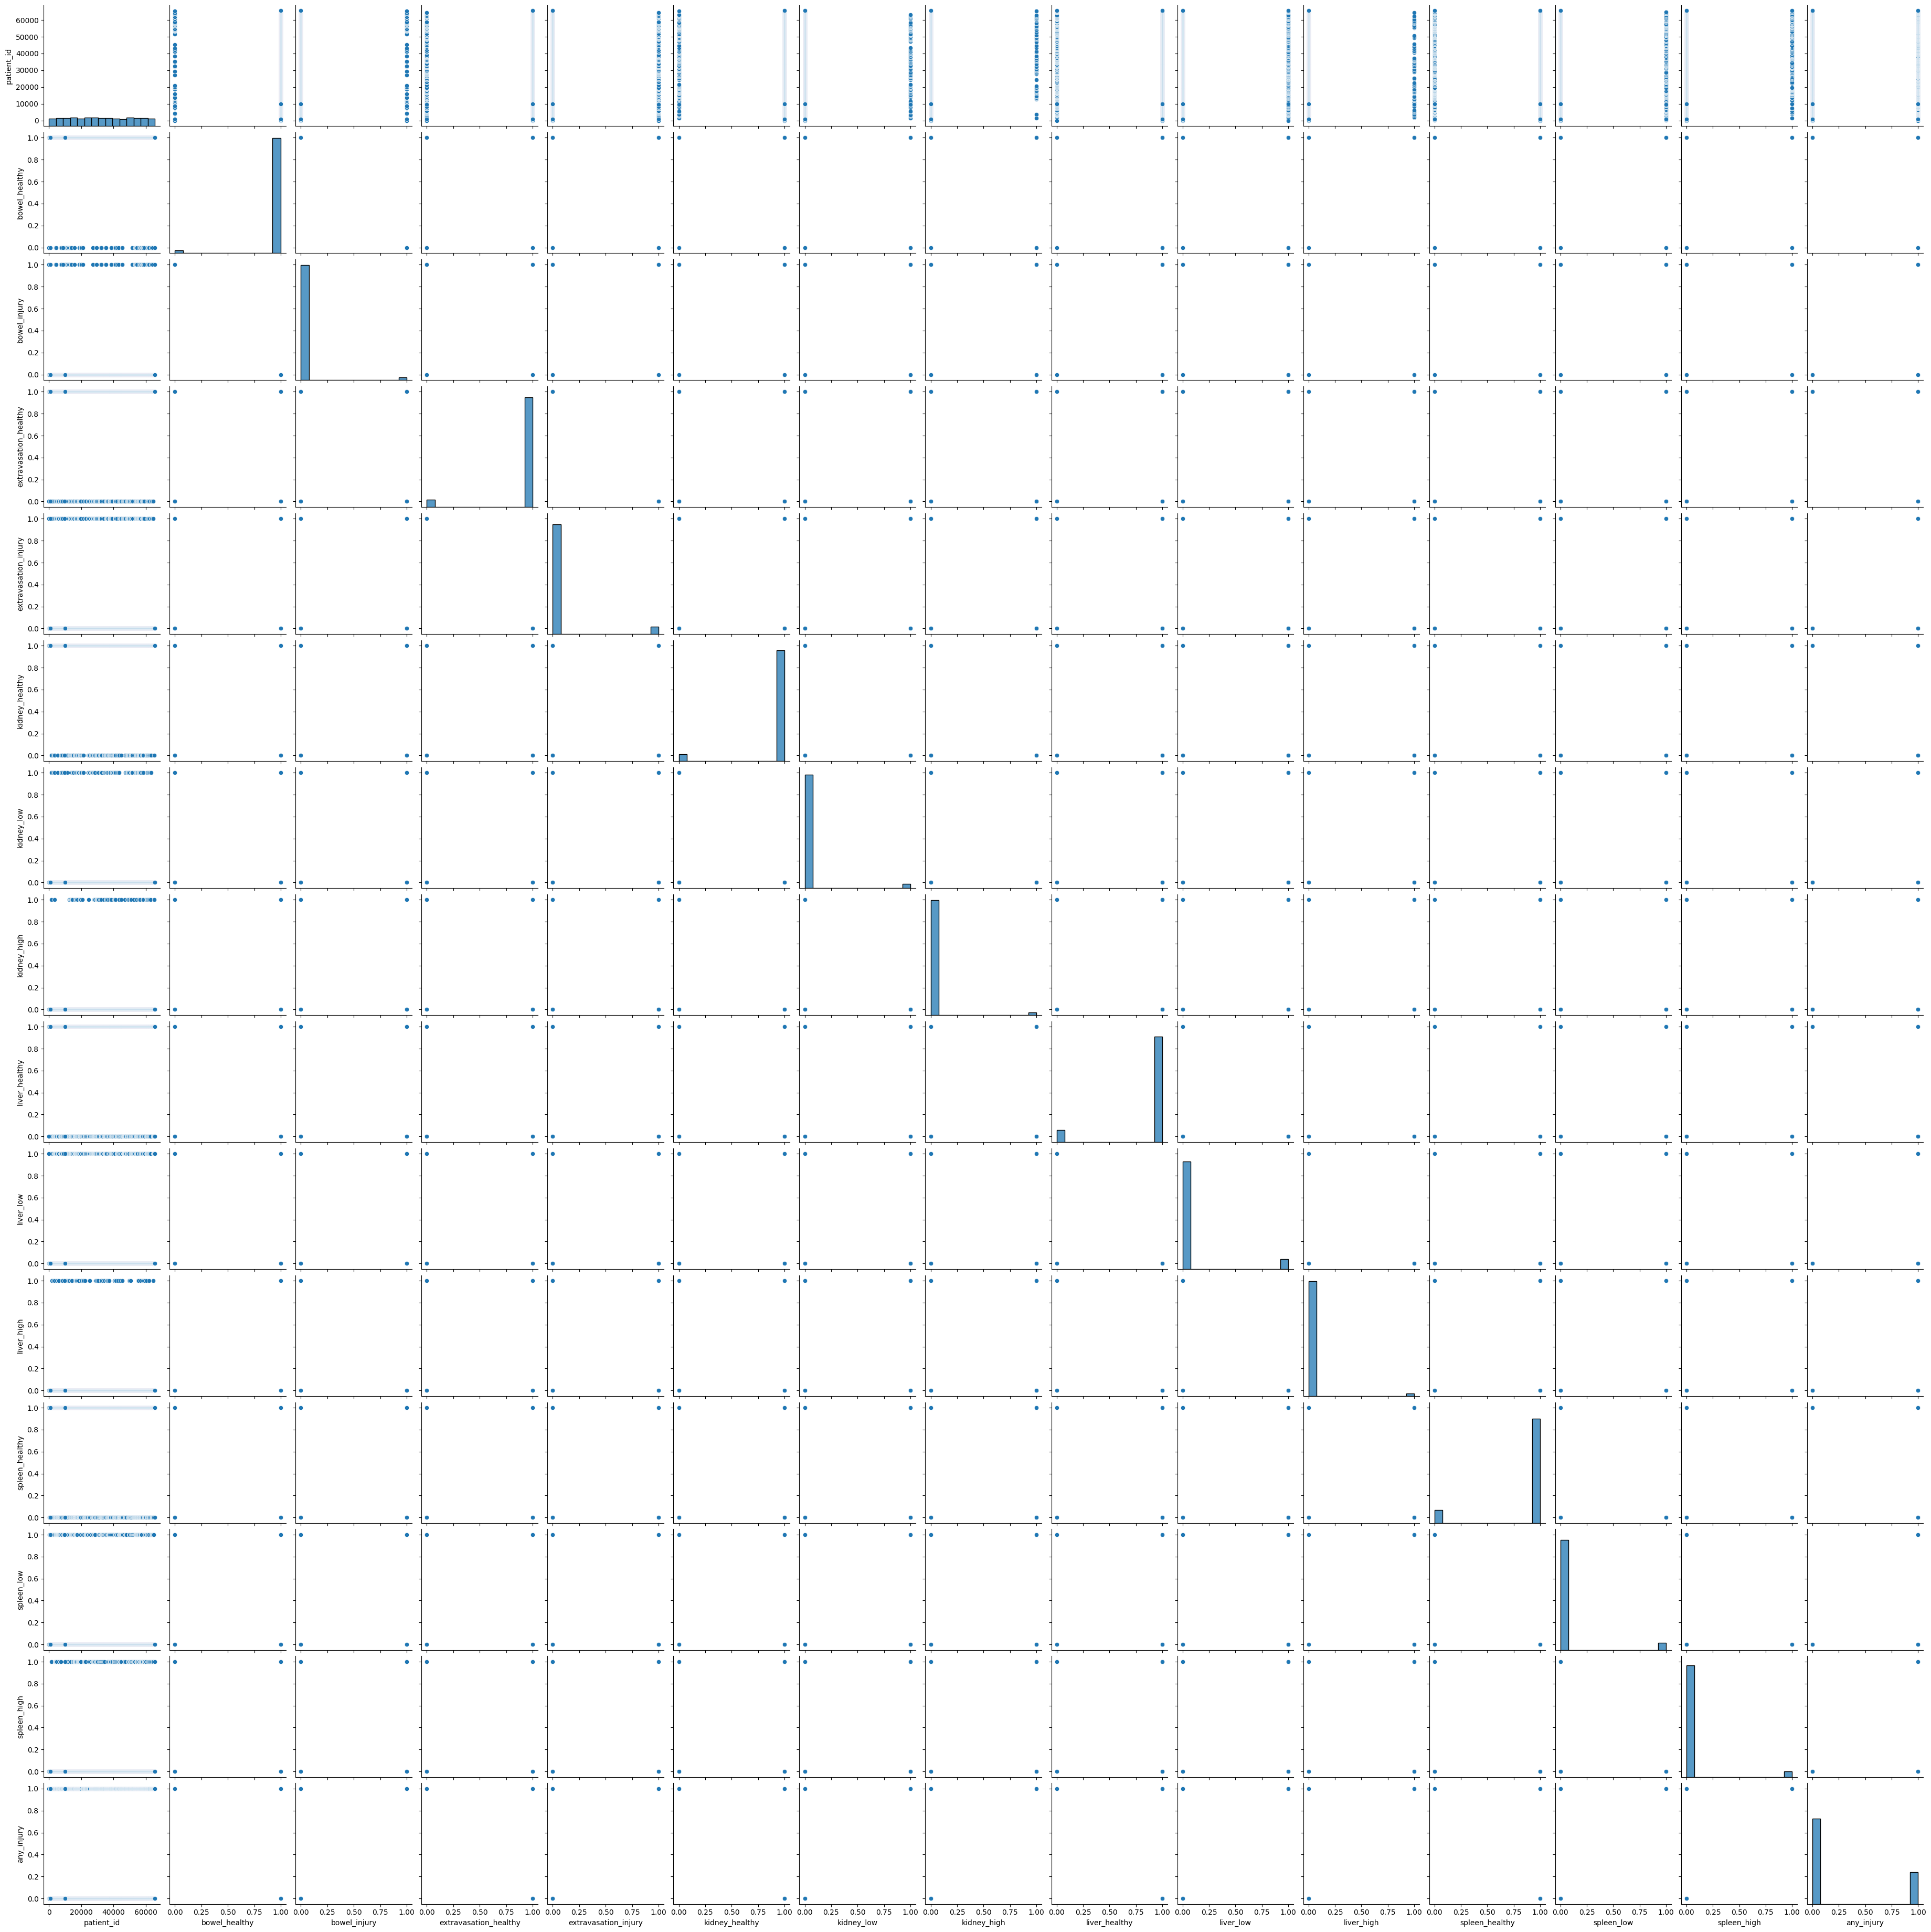

In [48]:
sns.pairplot(train_df)

In [47]:
train_meta_df.head()

,patient_id,series_id,aortic_hu,incomplete_organ
0,10004,21057,146.00,0
1,10004,51033,454.75,0
2,10005,18667,187.00,0
3,10007,47578,329.00,0
4,10026,29700,327.00,0


In [36]:
train_meta_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4711 entries, 0 to 4710
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   patient_id        4711 non-null   int64  
 1   series_id         4711 non-null   int64  
 2   aortic_hu         4711 non-null   float64
 3   incomplete_organ  4711 non-null   int64  
dtypes: float64(1), int64(3)
memory usage: 147.3 KB


In [37]:
train_meta_df.describe()

,patient_id,series_id,aortic_hu,incomplete_organ
count,4711.000000,4711.000000,4711.000000,4711.000000
mean,32722.826788,32661.752494,223.622373,0.066440
std,18745.299924,18800.490133,103.767762,0.249077
min,19.000000,3.000000,-1024.000000,0.000000
25%,16436.000000,16298.500000,147.000000,0.000000
50%,32235.000000,32387.000000,194.000000,0.000000
75%,49267.500000,48861.500000,280.000000,0.000000
max,65508.000000,65535.000000,1411.000000,1.000000


(<Axes: >,
 patient_id          0
 series_id           0
 aortic_hu           0
 incomplete_organ    0
 dtype: int64)

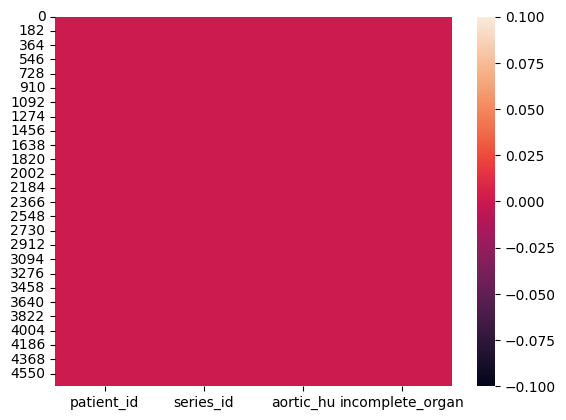

In [53]:
sns.heatmap(train_meta_df.isnull()), train_meta_df.isnull().sum()

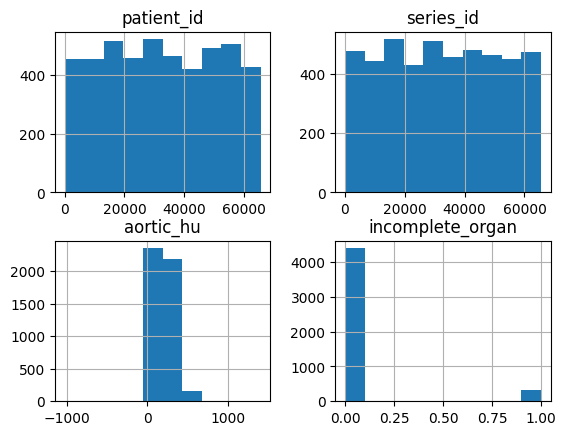

In [31]:
train_meta_df.hist();

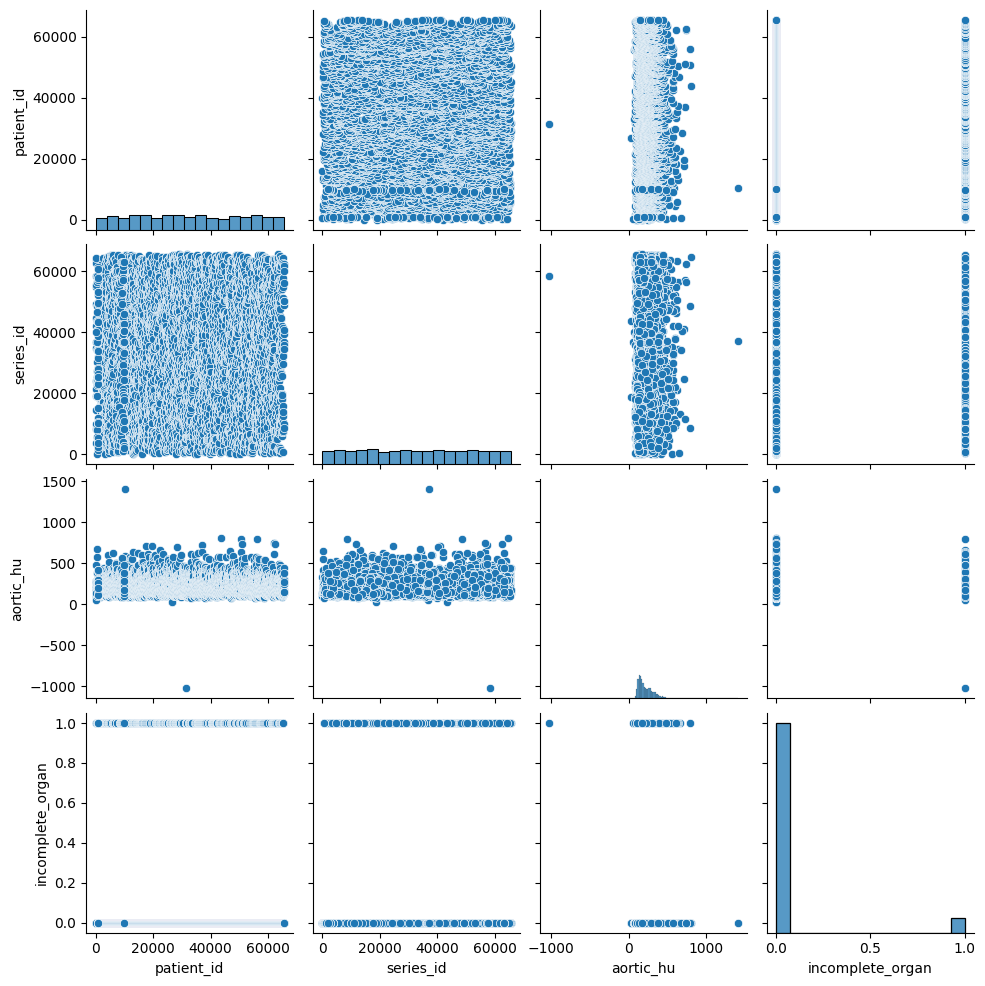

In [46]:
sns.pairplot(train_meta_df)

In [45]:
test_meta_df.head()

,patient_id,series_id,aortic_hu
0,48843,295,401.25
1,48843,62825,238.00
2,50046,24574,149.00
3,50046,60658,352.00
4,63706,39279,219.00


In [38]:
test_meta_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   patient_id  6 non-null      int64  
 1   series_id   6 non-null      int64  
 2   aortic_hu   6 non-null      float64
dtypes: float64(1), int64(2)
memory usage: 272.0 bytes


In [39]:
test_meta_df.describe()

,patient_id,series_id,aortic_hu
count,6.000000,6.000000,6.000000
mean,54198.333333,38169.333333,279.708333
std,7384.231650,23428.666686,93.863787
min,48843.000000,295.000000,149.000000
25%,49143.750000,28250.250000,223.750000
50%,50046.000000,40332.000000,278.500000
75%,60291.000000,55839.750000,343.750000
max,63706.000000,62825.000000,401.250000


(<Axes: >,
 patient_id    0
 series_id     0
 aortic_hu     0
 dtype: int64)

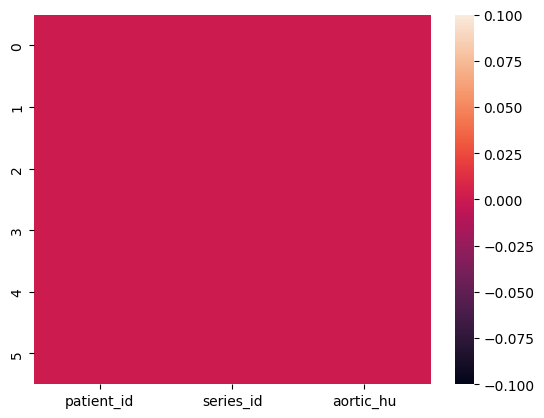

In [54]:
sns.heatmap(test_meta_df.isnull()), test_meta_df.isnull().sum()

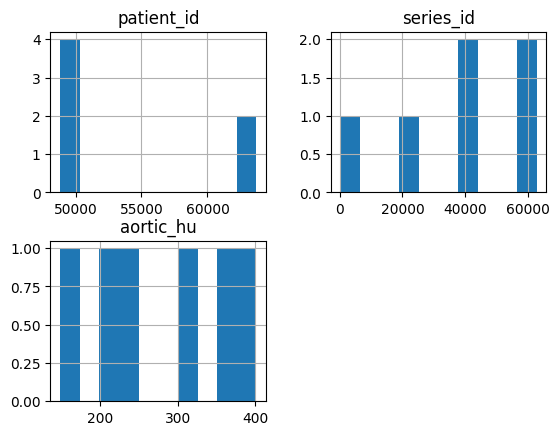

In [32]:
test_meta_df.hist();

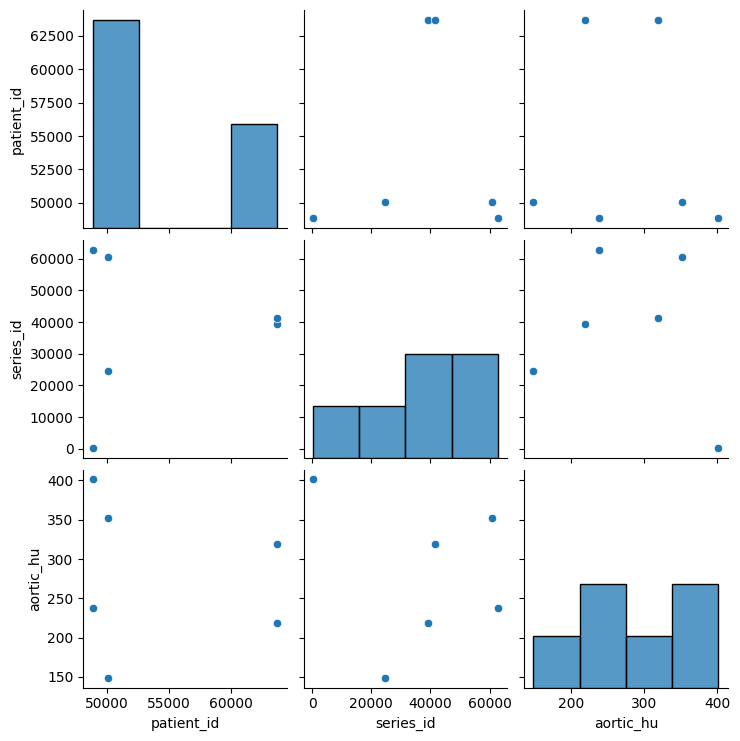

In [43]:
sns.pairplot(test_meta_df);

In [44]:
img_labels_df.head()

,patient_id,series_id,instance_number,injury_name
0,10004,21057,362,Active_Extravasation
1,10004,21057,363,Active_Extravasation
2,10004,21057,364,Active_Extravasation
3,10004,21057,365,Active_Extravasation
4,10004,21057,366,Active_Extravasation


In [40]:
img_labels_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12029 entries, 0 to 12028
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   patient_id       12029 non-null  int64 
 1   series_id        12029 non-null  int64 
 2   instance_number  12029 non-null  int64 
 3   injury_name      12029 non-null  object
dtypes: int64(3), object(1)
memory usage: 376.0+ KB


In [41]:
img_labels_df.describe()

,patient_id,series_id,instance_number
count,12029.000000,12029.000000,12029.000000
mean,34909.677862,31188.356056,311.704132
std,19532.614584,19532.946255,210.025487
min,33.000000,242.000000,11.000000
25%,15876.000000,14738.000000,130.000000
50%,36289.000000,28751.000000,252.000000
75%,53908.000000,49108.000000,456.000000
max,65456.000000,65514.000000,1065.000000


(<Axes: >,
 patient_id         0
 series_id          0
 instance_number    0
 injury_name        0
 dtype: int64)

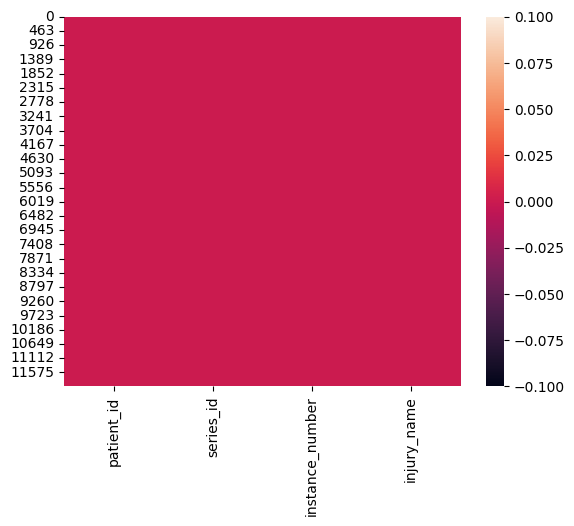

In [55]:
sns.heatmap(img_labels_df.isnull()), img_labels_df.isnull().sum()

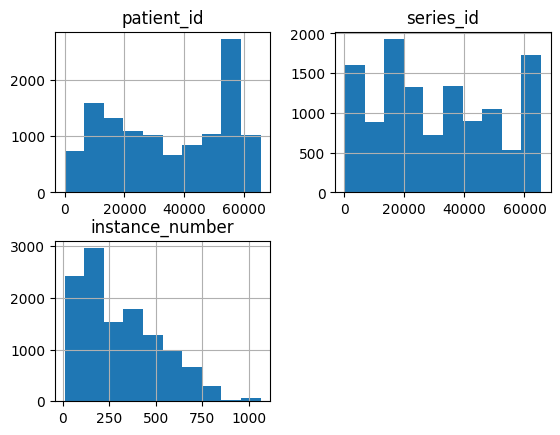

In [33]:
img_labels_df.hist();

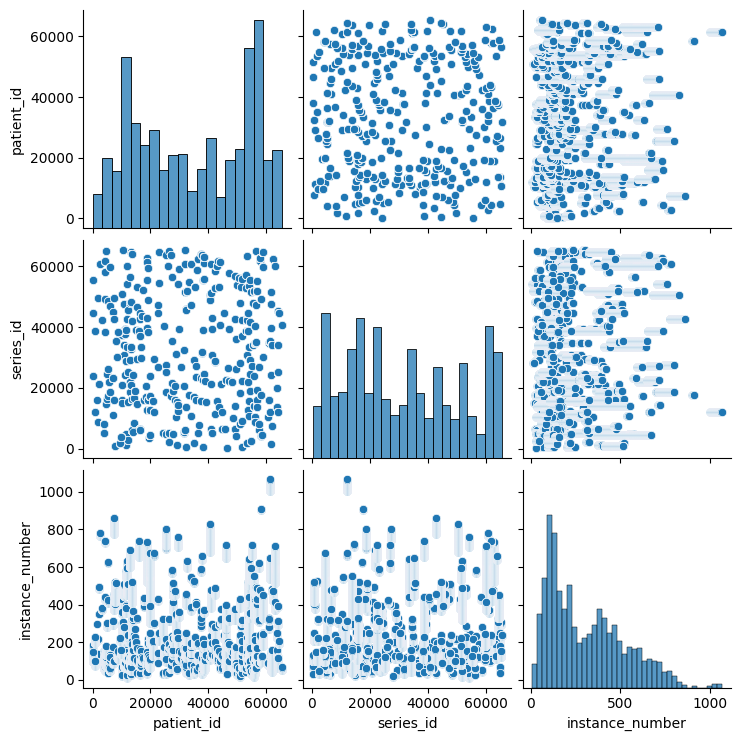

In [42]:
sns.pairplot(img_labels_df);

In [6]:
img_labels_df['injury_name'].value_counts()

Active_Extravasation    6370
Bowel                   5659
Name: injury_name, dtype: int64